# Statistical learning R2 Project

In [2]:
## Importing the required libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
### Reading the CSV File and taking only the required columns for analysis
stat=pd.read_csv("responses.csv")
Stat=stat[["Finances","Gender","Village - town","Healthy eating"]]
Stat

,Finances,Gender,Village - town,Healthy eating
0,3.0,female,village,4.0
1,3.0,female,city,3.0
2,2.0,female,city,3.0
3,2.0,female,city,3.0
4,4.0,female,village,4.0
5,2.0,male,city,2.0
6,4.0,female,village,4.0
7,3.0,male,city,2.0
8,2.0,female,city,1.0
9,4.0,female,city,3.0


In [18]:
## Checking for the null values in the dataset
Stat.isnull().sum(axis=0)

Finances          3
Gender            6
Village - town    4
Healthy eating    3
dtype: int64

In [30]:
### Since the values are required in Non-float format , replacing all null values with mode of the particular column
Stat['Finances'].fillna(Stat['Finances'].mode()[0],inplace=True)
Stat['Gender'].fillna(Stat['Gender'].mode()[0],inplace=True)
Stat['Village - town'].fillna(Stat['Village - town'].mode()[0],inplace=True)
Stat['Healthy eating'].fillna(Stat['Healthy eating'].mode()[0],inplace=True)

C:\Users\SHIVAKUMAR\Anaconda3\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [31]:
Stat.info()
### After fillna all the columns are found to have non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 4 columns):
Finances          1010 non-null float64
Gender            1010 non-null object
Village - town    1010 non-null object
Healthy eating    1010 non-null float64
dtypes: float64(2), object(2)
memory usage: 31.6+ KB


# Plotting the possible plots with the variables

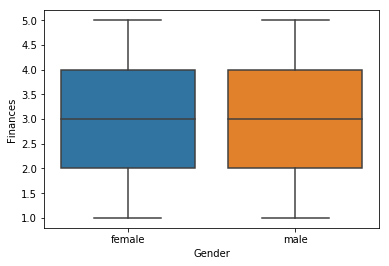

In [32]:
sns.boxplot(x="Gender",y="Finances",data=Stat)
### Money saving is more or less same for male and female

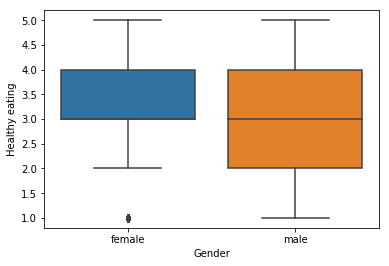

In [34]:
sns.boxplot(x="Gender",y="Healthy eating",data=Stat)
### Female are found to have more healthy eating habit than men

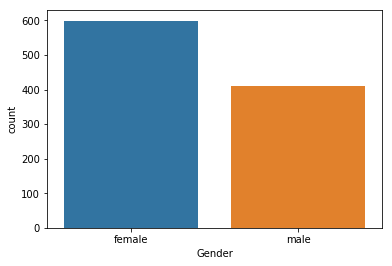

In [35]:
sns.countplot(x="Gender",data=Stat)

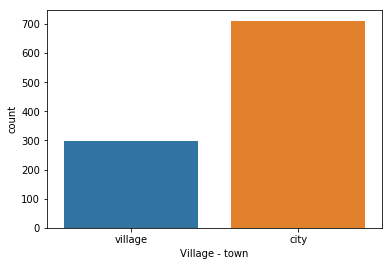

In [36]:
sns.countplot(x="Village - town",data=Stat)

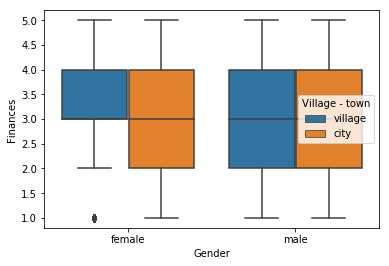

In [37]:
sns.boxplot(x="Gender",y="Finances",hue="Village - town",data=Stat)

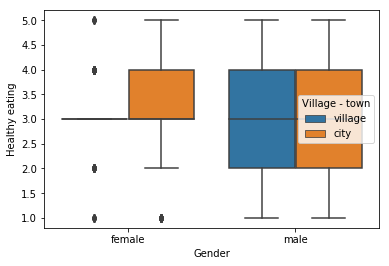

In [38]:
sns.boxplot(x="Gender",y="Healthy eating",hue="Village - town",data=Stat)

In [45]:
Stat["Gender"].value_counts()

female    599
male      411
Name: Gender, dtype: int64

In [46]:
Stat["Village - town"].value_counts()

city       711
village    299
Name: Village - town, dtype: int64

In [53]:
### Splitting the data as male/female and Village/town into Finance and Healthy eating

MaleFinance=Stat.loc[Stat["Gender"]=="male","Finances"]
FemaleFinance=Stat.loc[Stat["Gender"]=="female","Finances"]
MaleHealthy=Stat.loc[Stat["Gender"]=="male","Healthy eating"]
FemaleHealthy=Stat.loc[Stat["Gender"]=="female","Healthy eating"]
VillageFinance=Stat.loc[Stat["Village - town"]=="village","Finances"]
TownFinance=Stat.loc[Stat["Village - town"]=="city","Finances"]
VillageHealthy=Stat.loc[Stat["Village - town"]=="village","Healthy eating"]
TownHealthy=Stat.loc[Stat["Village - town"]=="city","Healthy eating"]

# HYPOTHESIS TESTING

Considering Confidence level of 95% and error rate of 5%

# 1) Is finances gender dependent?

H0: Finances is not gender dependent

H1: Finances is gender dependent

Using Chi-Square Test to find their association considering them to be mutually exclusive events

In [55]:
crosstab = pd.crosstab(Stat['Gender'], Stat['Finances'])
crosstab

Finances,1.0,2.0,3.0,4.0,5.0
Gender,,,,,
female,65,98,223,150,63
male,60,76,138,102,35


In [56]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(crosstab)
print("Chi2 Stat")
print(chi2_stat,"\n")
print("Degrees of Freedom")
print(dof,"\n")
print("P-Value")
print(p_val,"\n")
print("Contingency Table")
print(ex)

Chi2 Stat
5.328890527727397 

Degrees of Freedom
4 

P-Value
0.25518454225298753 

Contingency Table
[[ 74.13366337 103.19405941 214.0980198  149.45346535  58.12079208]
 [ 50.86633663  70.80594059 146.9019802  102.54653465  39.87920792]]


From the Chi-Square Test Analysis, its found that the P-value is greater than 0.05, so we failed to reject the null hypothesis.

Which Implies that the Money savings is not Gender Dependent.

# 2) Is there any differences in money saving (finances) between people from city or village?

H0: There is no significant difference in money saving between people from city or village.

H1: There is a significant difference in money saving between people from city or village.

* $H_0$: $\mu{CityFinance}$ = $\mu{VillageFinance}$
* $H_A$: $\mu{CityFinance}$ $\neq$ $\mu{VillageFinance}$

In [58]:
t_statistic,p_value=stats.ttest_ind(VillageFinance,TownFinance)
print("P_Value:",p_value)
if(p_value>0.05):
    print("We Failed to reject Null Hypothesis and there is no significant difference in money saving between people from city or village")
else:
    print("We reject Null Hypothesis and there is a significant difference in money saving between people from city or village")

P_Value: 0.008038213215420418
We reject Null Hypothesis and there is a significant difference in money saving between people from city or village


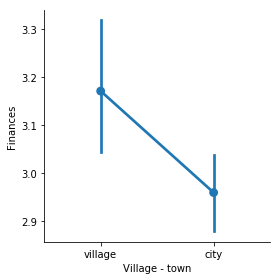

In [5]:
sns.factorplot(x="Village - town",y="Finances",data=Stat)
### Village people are found to have more money savings attitude.

# 3) Do Women have a Healthier Lifestyle than Men?

H0: There is no significant difference in healthier lifestyle between men and women.

H1: There is a significant difference in healthier lifestyle between men and women.

* $H_0$: $\mu{WomenHealthlifestyle}$ = $\mu{MenHealthlifestyle}$
* $H_A$: $\mu{WomenHealthlifestyle}$ $\neq$ $\mu{MenHealthlifestyle}$

In [59]:
t_statistic,p_value=stats.ttest_ind(MaleHealthy,FemaleHealthy)
print("P_Value:",p_value)
if(p_value>0.05):
    print("We Failed to reject Null Hypothesis and there is no significant difference in healthier lifestyle between men and women")
else:
    print("We reject Null Hypothesis and there is a significant difference in healthier lifestyle between men and women. ")

P_Value: 0.04685965412880698
We reject Null Hypothesis and there is a significant difference in healthier lifestyle between men and women. 


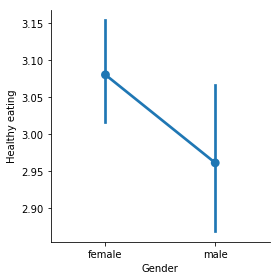

In [63]:
sns.factorplot(x="Gender",y="Healthy eating",data=Stat)

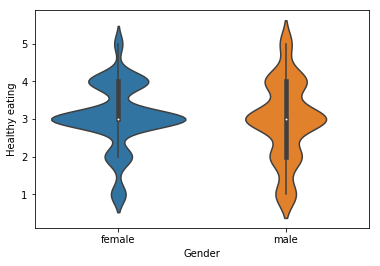

In [64]:
sns.violinplot(x="Gender",y="Healthy eating",data=Stat)

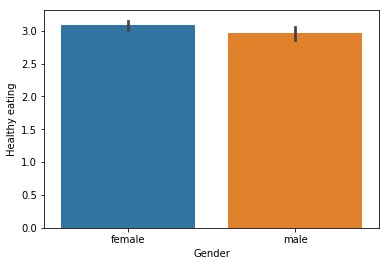

In [66]:
sns.barplot(x='Gender',y='Healthy eating',data=Stat)

# 4) Are Village People Healthier than City People

H0: There is no significant difference in healthier lifestyle between people from city or village.

H1: There is a significant difference in healthier lifestyle between people from city or village.

* $H_0$: $\mu{VillageHealthlifestyle}$ = $\mu{TownHealthlifestyle}$
* $H_A$: $\mu{VillageHealthlifestyle}$ $\neq$ $\mu{TownHealthlifestyle}$

In [60]:
t_statistic,p_value=stats.ttest_ind(VillageHealthy,TownHealthy)
print("P_Value:",p_value)
if(p_value>0.05):
    print("We Failed to reject Null Hypothesis and there is no significant difference in healthier lifestyle between people from city or village")
else:
    print("We reject Null Hypothesis and there is a significant difference in healthier lifestyle between people from city or village")

P_Value: 0.2864594559841501
We Failed to reject Null Hypothesis and there is no significant difference in healthier lifestyle between people from city or village
